In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###  Loading the dataset 

In [2]:
data=pd.read_csv('titanic_dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Setting ‘PassengerId’ as the index column

In [3]:
data= data.set_index("PassengerId")
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### Basic details of the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
data.shape

(891, 11)

In [6]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### Filling missing values present in all the columns in the dataset

##### Here the columns 'Age', 'Cabin' and 'Embarked' have null values

In [8]:
# Replacing null values in 'Age' with median
data['Age']=data['Age'].fillna(data['Age'].median())

In [9]:
# Replacing null values in 'cabin' as unknown
data['Cabin']= data['Cabin'].fillna('Unknown')

In [10]:
# Replacing null values in 'Embarked' with mode
data['Embarked']= data['Embarked'].fillna(data['Embarked'].mode()[0])

In [11]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### Checking for outliers using boxplot

<AxesSubplot:xlabel='Age'>

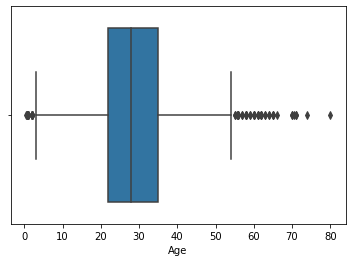

In [12]:
sns.boxplot(x='Age',data=data)

<AxesSubplot:xlabel='SibSp'>

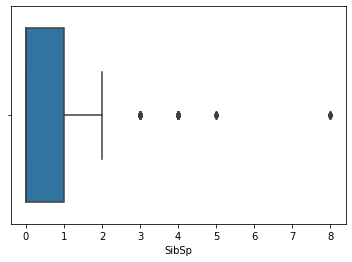

In [13]:
sns.boxplot(x='SibSp',data=data)

<AxesSubplot:xlabel='Fare'>

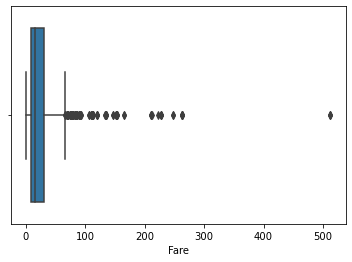

In [14]:
sns.boxplot(x='Fare',data=data)

### Handling outliers using IQR method

In [15]:
# AGE

# Finding quartiles
Q1 = np.percentile(data['Age'],25)
Q2 = np.percentile(data['Age'],50)
Q3 = np.percentile(data['Age'],75)

IQR = Q3 - Q1

# Limits for outliers
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR

outlier = []

for i in data['Age']:
    if i < low_lim or i > up_lim:
        outlier.append(i)

drop_ind = data[(data['Age'] < low_lim) | (data['Age'] > up_lim)].index
data.drop(drop_ind, inplace = True)

<AxesSubplot:xlabel='Age'>

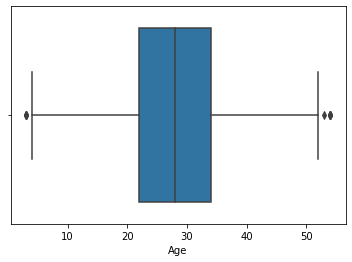

In [16]:
sns.boxplot(x='Age',data=data)

In [17]:
# SibSp

# Finding quartiles
Q1 = np.percentile(data['SibSp'],25)
Q2 = np.percentile(data['SibSp'],50)
Q3 = np.percentile(data['SibSp'],75)

IQR = Q3 - Q1

# Limits for outliers
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR

outlier = []

for i in data['SibSp']:
    if i < low_lim or i > up_lim:
        outlier.append(i)

drop_ind = data[(data['SibSp'] < low_lim) | (data['SibSp'] > up_lim)].index
data.drop(drop_ind, inplace = True)

<AxesSubplot:xlabel='SibSp'>

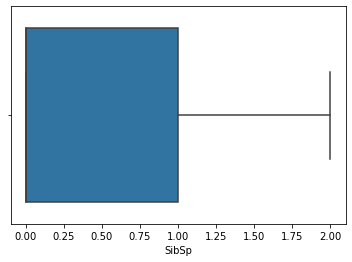

In [18]:
sns.boxplot(x='SibSp',data=data)

In [19]:
# FARE

# Finding quartiles
Q1 = np.percentile(data['Fare'],25)
Q2 = np.percentile(data['Fare'],50)
Q3 = np.percentile(data['Fare'],75)

IQR = Q3 - Q1

# Limits for outliers
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR

outlier = []

for i in data['Fare']:
    if i < low_lim or i > up_lim:
        outlier.append(i)

drop_ind = data[(data['Fare'] < low_lim) | (data['Fare'] > up_lim)].index
data.drop(drop_ind, inplace = True)

<AxesSubplot:xlabel='Fare'>

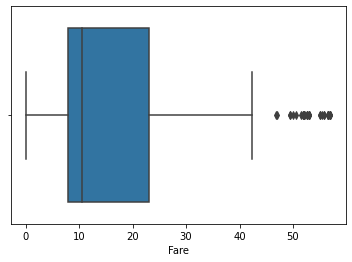

In [20]:
sns.boxplot(x='Fare',data=data)

### Min max scaling on the feature set

In [21]:
data1=data.drop(['Name','Ticket','Cabin'],axis=1)

In [22]:
data1=pd.get_dummies(data1)

In [23]:
x=data1.drop('Survived',axis=1)
y=data1['Survived']

In [24]:
from sklearn import preprocessing

In [25]:
min_max=preprocessing.MinMaxScaler()

In [26]:
x=min_max.fit_transform(x)

### Model building

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=123)

In [28]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [29]:
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix

##### Gaussian model

In [30]:
gaussian_model=GaussianNB()

In [31]:
gaussian_model.fit(x_train,y_train)
gaussian_pred=gaussian_model.predict(x_test)

In [32]:
accuracy_score(y_test,gaussian_pred)

0.7737226277372263

In [33]:
confusion_matrix(y_test,gaussian_pred)

array([[72, 19],
       [12, 34]], dtype=int64)

##### Bernoulli model

In [34]:
bernoulli_model=BernoulliNB()

In [35]:
bernoulli_model.fit(x_train,y_train)
bernoulli_pred=bernoulli_model.predict(x_test)

In [36]:
accuracy_score(y_test,bernoulli_pred)

0.8102189781021898

In [37]:
confusion_matrix(y_test,bernoulli_pred)

array([[81, 10],
       [16, 30]], dtype=int64)

##### Logistic regression model

In [38]:
lg_model=LogisticRegression()

In [39]:
lg_model.fit(x_train,y_train)
lg_pred=lg_model.predict(x_test)

In [40]:
accuracy_score(y_test,lg_pred)

0.7883211678832117

In [41]:
confusion_matrix(y_test,lg_pred)

array([[78, 13],
       [16, 30]], dtype=int64)

##### Decision tree classifier

In [42]:
tree_model=DecisionTreeClassifier()

In [43]:
tree_model.fit(x_train,y_train)
tree_pred=tree_model.predict(x_test)

In [44]:
accuracy_score(y_test,tree_pred)

0.8029197080291971

In [45]:
confusion_matrix(y_test,tree_pred)

array([[77, 14],
       [13, 33]], dtype=int64)

###### SVM model

In [46]:
svm=SVC()

In [47]:
svm.fit(x_train,y_train)
svm_pred=svm.predict(x_test)

In [48]:
accuracy_score(y_test,svm_pred)

0.781021897810219

In [49]:
confusion_matrix(y_test,svm_pred)

array([[87,  4],
       [26, 20]], dtype=int64)

##### Random forest classifier

In [50]:
rf_model=RandomForestClassifier()

In [51]:
rf_model.fit(x_train,y_train)
rf_pred=rf_model.predict(x_test)

In [52]:
accuracy_score(y_test,rf_pred)

0.7883211678832117

In [53]:
confusion_matrix(y_test,rf_pred)

array([[75, 16],
       [13, 33]], dtype=int64)

##### Different classification models were tried and their testing accuracy is as follows

* Gaussian model - 77.37%
* Bernoulli model - 81.02%
* Logistic regression model - 78.83%
* Decision tree classifier - 81.02%
* SVM model - 78.1%
* Random forest classifier - 77.37%

##### Overall, Bernoulli model and decision tree classifier model give a better test accuracy of 81% compared to other classification models.